In [1]:
import pandas as pd
import numpy as np

In [3]:
dfhi = pd.read_csv("../data/fluxes.csv")
dflo = pd.read_csv("../data/fluxes_lowtol.csv")

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

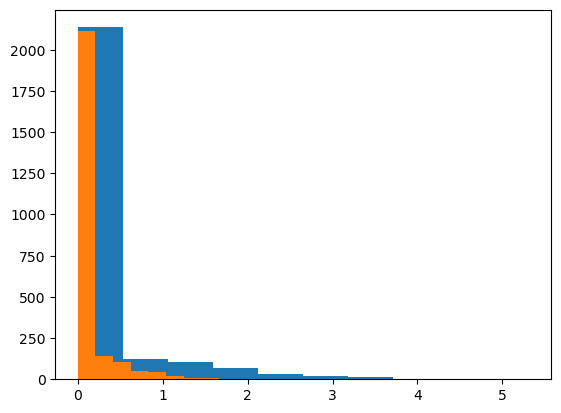

In [5]:
plt.hist(dfhi["timing"]/60/60)
plt.hist(dflo["timing"]/60/60)
plt.show()

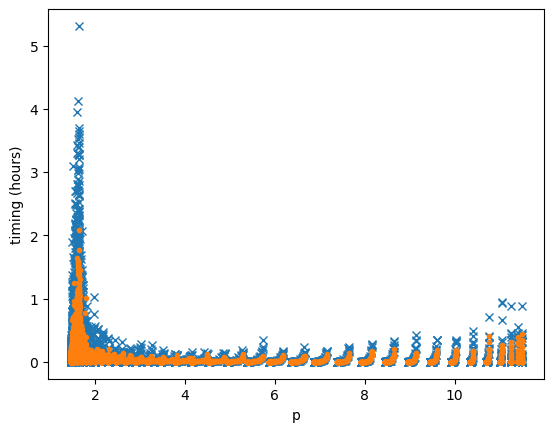

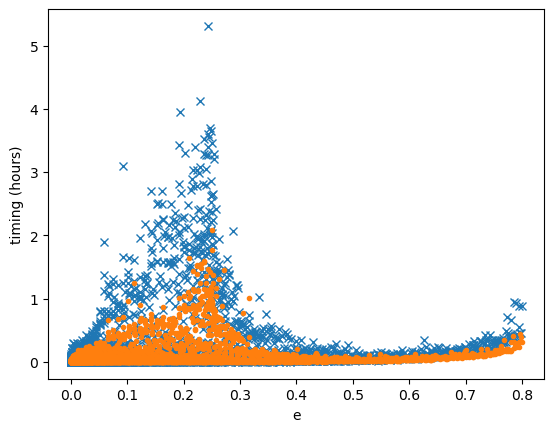

In [6]:
plt.plot(dfhi["p"], dfhi["timing"]/60/60, 'x')
plt.plot(dflo["p"], dflo["timing"]/60/60, '.')
plt.xlabel('p')
plt.ylabel('timing (hours)')
plt.show()
plt.plot(dfhi["e"], dfhi["timing"]/60/60, 'x')
plt.plot(dflo["e"], dflo["timing"]/60/60, '.')
plt.xlabel('e')
plt.ylabel('timing (hours)')
plt.show()

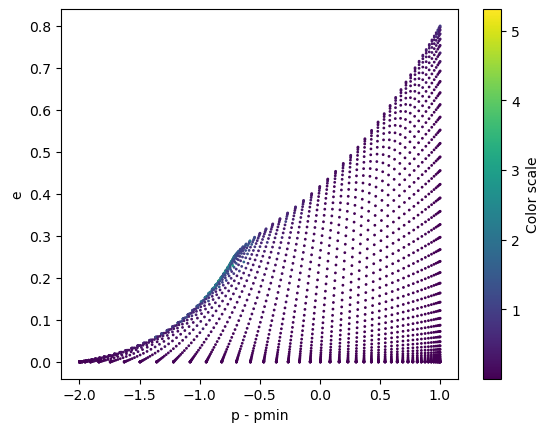

In [7]:
timing = dfhi["timing"]/60/60

scatter = plt.scatter(np.log10(dfhi["p"] - np.min(dfhi["p"]) + 0.01), dfhi["e"], c=timing, cmap="viridis", s=1)
plt.colorbar(scatter, label='Color scale')
plt.xlabel('p - pmin')
plt.ylabel('e')
plt.show()

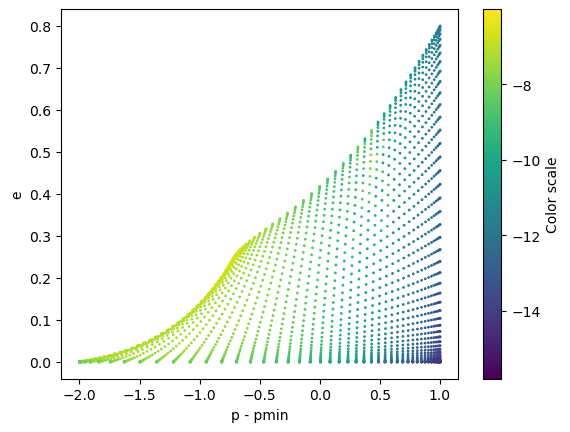

In [8]:
scatter = plt.scatter(np.log10(dfhi["p"] - np.min(dfhi["p"]) + 0.01), dfhi["e"], c=np.log10(np.abs(dfhi["Edot"]-dflo["Edot"])), cmap="viridis", s=1)
plt.colorbar(scatter, label='Color scale')
plt.xlabel('p - pmin')
plt.ylabel('e')
plt.show()

In [9]:
from cheby import chebcolloc_2d

Edot = dfhi["Edot"].to_numpy().reshape(50, 50)
ucoord = dfhi["u"].to_numpy().reshape(50, 50)[:, 0]
wcoord = dfhi["w"].to_numpy().reshape(50, 50)[0]
ch = chebcolloc_2d(Edot, domains=[[0, 1], [0,1]])

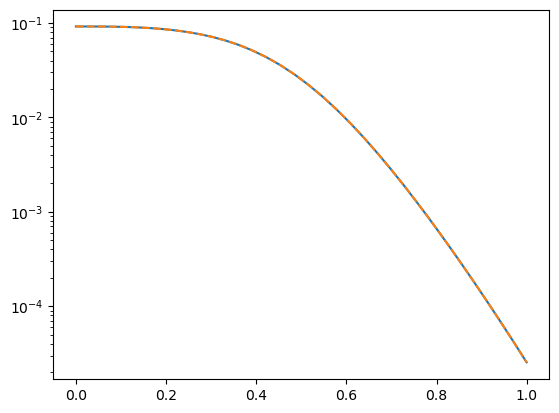

In [10]:
U, W = np.meshgrid(np.linspace(0,1,50), np.linspace(0,1,50), indexing='ij')
plt.plot(ucoord, Edot[:, 0])
plt.plot(U[:,0], ch(U, W)[:, 0], '--')
plt.yscale('log')
plt.show()